In [1]:
import functools
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad, dblquad

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

In [2]:
z = 1.9 * 10**(-2) # 6 \pi r (n_c / n_m) (J^2 / eF * J')
a = z * 10**(-3)  # tau_{imp}^{-1}

def y_10(x, phi, alpha):
    return 3 / (4 * np.pi) * (x * np.cos(alpha) + np.sqrt(1 - x**2) * np.cos(phi) * np.sin(alpha) )**2

def y_11(x, phi, alpha):
    return 3 / (8 * np.pi) * ( (x * np.sin(alpha) - np.sqrt(1 - x**2) * np.cos(phi) * np.cos(alpha))**2 + (1 - x**2) * np.sin(phi)**2 )

def h(x, phi, alpha, s):
    if s == +1:
        return 2/3 * y_10(x, phi, alpha) * y_11(x, phi, alpha)
    elif s == -1:
        return 1/3 * y_11(x, phi, alpha) * y_11(x, phi, alpha)
    raise ValueError(f's must be +1 or -1, got {s}')

def integrand_I(z, z0, alpha, x, phi):
    return 3 / (8 * np.pi) * x**2 * (
          ( 1 + h(x, phi, alpha, +1) * np.log(1/z0) * z )**(-1)
        + ( 1 + h(x, phi, alpha, -1) * np.log(1/z0) * z )**(-1)
    )

def I(z, z0, alpha):
    return dblquad(lambda phi, x: integrand_I(z, z0, alpha, x, phi), -1, 1, 0, 2 * np.pi)[0]

def A(z, z0, alpha):
    return 1 - I(z, z0, alpha) / I(z, z0, 0)

def integrand_alpha(alpha: float, a: float = 1.9 * 10**(-5)):
    def _integrand(T: float):
        return lambda y, x: x**2 / (2 * np.pi)**2 * (
            1 / ( a + 2/3 * z * T * y_10(x, y, alpha) * y_11(x, y, alpha) )
            + 1 / ( a + 1/3 * z * T * y_11(x, y, alpha)**2 )
        )
    return _integrand

def integrand_z(T: float):
    return lambda x: x**2 / (2 * np.pi) * (
        1 / (a + 3/(16 * np.pi**2) * z * T * x**2 * (1 - x**2))
        + 1 / (a + 3/(64 * np.pi**2) * z * T * (1 - x**2)**2)    
    )

def integrand_x(T: float):
    return lambda y, x: x**2 / (2 * np.pi)**2 * (
        1 / (a + 3/(16 * np.pi**2) * z * T * (1 - x**2) * np.cos(y)**2 * (x**2 + (1 - x**2) * np.sin(y)**2)) 
        + 1 / (a + 3/(64 * np.pi**2) * z * T * (x**2 + (1 - x**2) * np.sin(y)**2)**2)
    )

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


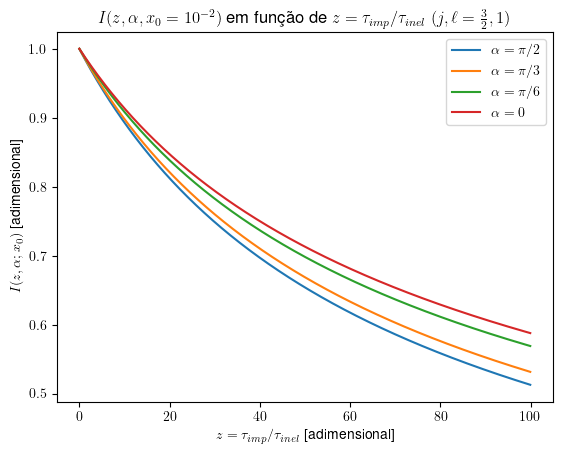

In [3]:
"""
Plot de I(z, z0, alpha) em função de z
alpha = 0, pi/6, pi/3, pi/2
x0 = 1e-2
"""

x0 = 1e-2
zs = np.arange(0, 100, 0.1)

Ix = np.array([I(z, x0, np.pi / 2) for z in zs])
I1 = np.array([I(z, x0, np.pi / 3) for z in zs])
I2 = np.array([I(z, x0, np.pi / 6) for z in zs])
Iz = np.array([I(z, x0, 0) for z in zs])

fig, ax = plt.subplots()
ax.set_title(r'$I(z,\alpha,x_{0}=10^{-2})$ em função de $z={\tau_{imp}}/{\tau_{inel}}$ $(j,\ell=\frac{3}{2},1)$')
ax.plot(zs, Ix, label=r'$\alpha={\pi}/{2}$')
ax.plot(zs, I1, label=r'$\alpha={\pi}/{3}$')
ax.plot(zs, I2, label=r'$\alpha={\pi}/{6}$')
ax.plot(zs, Iz, label=r'$\alpha=0$')
ax.legend(loc='upper right')
ax.set_xlabel(r'$z = {\tau_{imp}}/{\tau_{inel}}$ [adimensional]')
ax.set_ylabel(r'$I(z, \alpha; x_0)$ [adimensional]')
plt.savefig('I_z__3_2.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


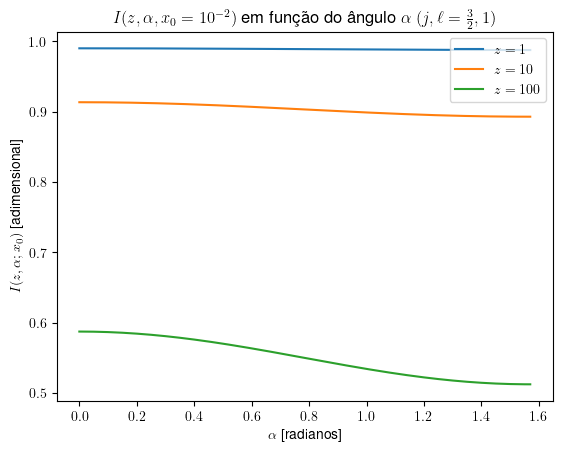

In [4]:
"""
Plot de I(z, z0, alpha) em função de alpha
z = 1, 10, 100
x0 = 1e-2
"""

x0 = 1e-2
alphas = np.arange(0, np.pi / 2, 0.01)

I1 = np.array([I(1, x0, a) for a in alphas])
I10 = np.array([I(10, x0, a) for a in alphas])
I100 = np.array([I(100, x0, a) for a in alphas])

fig, ax = plt.subplots()
ax.set_title(r'$I(z,\alpha,x_{0}=10^{-2})$ em função do ângulo $\alpha$ $(j,\ell=\frac{3}{2},1)$')
ax.plot(alphas, I1, label=r'$z=1$')
ax.plot(alphas, I10, label=r'$z=10$')
ax.plot(alphas, I100, label=r'$z=100$')
ax.legend(loc='upper right')
ax.set_xlabel(r'$\alpha$ [radianos]')
ax.set_ylabel(r'$I(z, \alpha; x_0)$ [adimensional]')
plt.savefig('I_alphas__3_2.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


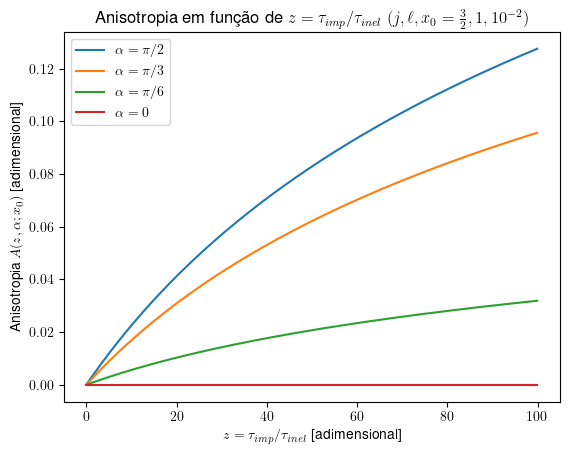

In [5]:
"""
Plot de A(z, z0, alpha) em função de z
alpha = 0, pi/6, pi/3, pi/2
x0 = 1e-2
"""

x0 = 1e-2
zs = np.arange(0, 100, 0.1)

Ax = np.array([A(z, x0, np.pi / 2) for z in zs])
A1 = np.array([A(z, x0, np.pi / 3) for z in zs])
A2 = np.array([A(z, x0, np.pi / 6) for z in zs])
Az = np.array([A(z, x0, 0) for z in zs])

fig, ax = plt.subplots()
ax.set_title(r'Anisotropia em função de $z={\tau_{imp}}/{\tau_{inel}}$ $(j,\ell,x_0 = \frac{3}{2}, 1, 10^{-2})$')
ax.plot(zs, Ax, label=r'$\alpha={\pi}/{2}$')
ax.plot(zs, A1, label=r'$\alpha={\pi}/{3}$')
ax.plot(zs, A2, label=r'$\alpha={\pi}/{6}$')
ax.plot(zs, Az, label=r'$\alpha=0$')
ax.legend(loc='upper left')
ax.set_xlabel(r'$z = {\tau_{imp}}/{\tau_{inel}}$ [adimensional]')
ax.set_ylabel(r'Anisotropia $A(z, \alpha; x_0)$ [adimensional]')
plt.savefig('A_z__3_2.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


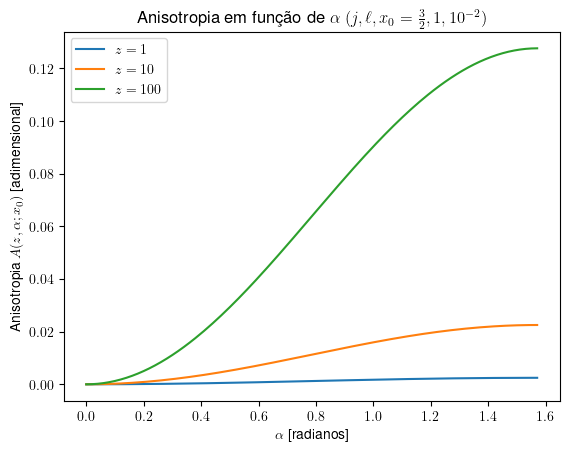

In [6]:
"""
Plot de A(z, z0, alpha) em função de \alpha
z = 1, 10, 100
x0 = 1e-2
"""

x0 = 1e-2
alphas = np.arange(0, np.pi / 2, 0.01)

A1 = np.array([A(1, x0, a) for a in alphas])
A10 = np.array([A(10, x0, a) for a in alphas])
A100 = np.array([A(100, x0, a) for a in alphas])

fig, ax = plt.subplots()
ax.set_title(r'Anisotropia em função de $\alpha$ $(j,\ell,x_0 = \frac{3}{2}, 1, 10^{-2})$')
ax.plot(alphas, A1, label=r'$z=1$')
ax.plot(alphas, A10, label=r'$z=10$')
ax.plot(alphas, A100, label=r'$z=100$')
ax.legend(loc='upper left')
ax.set_xlabel(r'$\alpha$ [radianos]')
ax.set_ylabel(r'Anisotropia $A(z, \alpha; x_0)$ [adimensional]')
plt.savefig('A_alphas__3_2.eps', format='eps')

In [3]:
Ts = np.arange(0.1, 1, 0.02)

print('Calculating sigma_zz_z...')
sigma_zz_z = np.array([dblquad(integrand_alpha(0)(T), -1, 1, 0, 2 * np.pi) for T in Ts])
print('Calculations done for sigma_zz_z')

print('Calculating sigma_zz_x...')
sigma_zz_x = np.array([dblquad(integrand_alpha(np.pi / 2)(T), -1, 1, 0, 2 * np.pi) for T in Ts])
print('Calculations done for sigma_zz_x')

Calculating sigma_zz_z...
Calculations done for sigma_zz_z
Calculating sigma_zz_x...
Calculations done for sigma_zz_x


In [4]:
Z = np.array([y[0] for y in sigma_zz_z])
Zerr = np.array([y[1] for y in sigma_zz_z])

X = np.array([y[0] for y in sigma_zz_x])
Xerr = np.array([y[1] for y in sigma_zz_x])

A = 1 - X / Z
Aerr = np.abs(X/Z) * np.sqrt( (Xerr/X)**2 + (Zerr/Z)**2 )

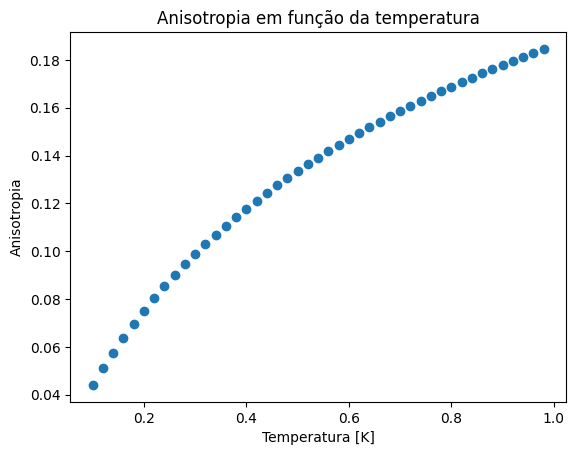

In [5]:
fig, ax = plt.subplots()
ax.errorbar(Ts, A, Aerr, fmt='o')
ax.set_title('Anisotropia em função da temperatura')
ax.set_xlabel('Temperatura [K]')
ax.set_ylabel('Anisotropia')
plt.savefig('anosotropia_temperatura.png')

In [6]:
f'Erro de integração <= {max(Aerr):.2e}'

'Erro de integração <= 3.70e-06'

### Plot de sigma

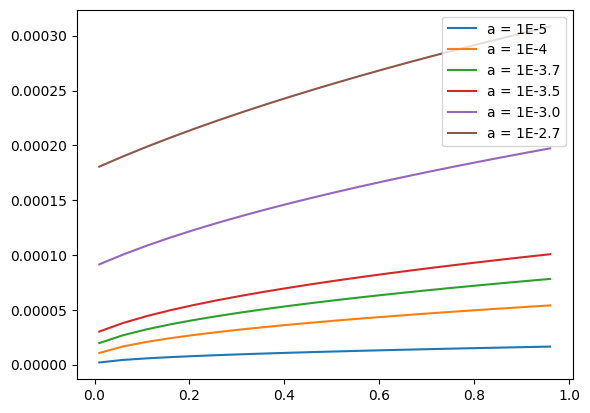

<Figure size 640x480 with 0 Axes>

In [27]:
Ts = np.arange(0.01, 1, 0.05)
rho = lambda a: 1 / np.array([dblquad(integrand_alpha(0, a)(T), -1, 1, 0, 2 * np.pi)[0] for T in Ts])
plt.plot(Ts, rho(z * 10**(-5)), label='a = 1E-5')
plt.plot(Ts, rho(z * 10**(-4)), label='a = 1E-4')
plt.plot(Ts, rho(z * 10**(-3.7)), label='a = 1E-3.7')
plt.plot(Ts, rho(z * 10**(-3.5)), label='a = 1E-3.5')
plt.plot(Ts, rho(z * 10**(-3.0)), label='a = 1E-3.0')
plt.plot(Ts, rho(z * 10**(-2.7)), label='a = 1E-2.7')
plt.legend(loc='upper right')
plt.show()
plt.savefig('rho.png')

# Anisotropia em função do ângulo

In [8]:
temperature = .5
angles = np.arange(0, np.pi / 2, 0.03)

print('Calculating sigma_zz_z...')
sigma_zz_z2 = quad(integrand_z(temperature), -1, 1)
print('Calculations done for sigma_zz_z')

print('Calculating sigma_zz_alpha...')
sigma_zz_alpha = np.array([dblquad(integrand_alpha(alpha)(temperature), -1, 1, 0, 2 * np.pi) for alpha in angles])
print('Calculations done for sigma_zz_alpha')

sigma_zz_z2 = np.array([sigma_zz_z2 for _ in sigma_zz_alpha])

# separating sigmas and errors
Z2 = np.array([x[0] for x in sigma_zz_z2])
Z2_err = np.array([x[1] for x in sigma_zz_z2])

Alph = np.array([x[0] for x in sigma_zz_alpha])
Alph_err = np.array([x[1] for x in sigma_zz_alpha])

R = Alph / Z2

A2 = 1 - Alph / Z2
err_A2 = np.sqrt( R**2 * ( (Z2_err / Z2)**2 + (Alph_err / Alph)**2 ) )

Calculating sigma_zz_z...
Calculations done for sigma_zz_z
Calculating sigma_zz_alpha...
Calculations done for sigma_zz_alpha


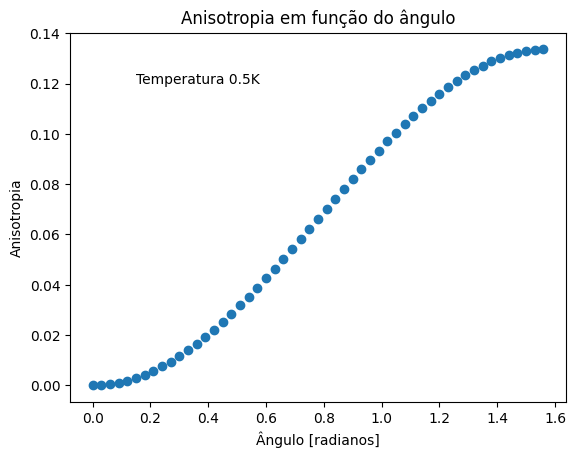

In [9]:
fig2, ax2 = plt.subplots()
ax2.errorbar(angles, A2, err_A2, fmt='o')
ax2.set_title('Anisotropia em função do ângulo')
ax2.set_xlabel('Ângulo [radianos]')
ax2.set_ylabel('Anisotropia')
ax2.text(0.15, 0.12, f'Temperatura {temperature:.1f}K')
plt.savefig('anosotropia_angulo.png')

In [10]:
f'Erro de integração <= {max(err_A2)}'

'Erro de integração <= 2.328170684940146e-06'